<a href="https://colab.research.google.com/github/nahidosen/Group_5_CSE445_3_Spring_21/blob/main/ipynb/Project_icct20withOneHot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [650]:
!pip install scikit-plot

In [651]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scikitplot as skplt
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [652]:
data = 'https://raw.githubusercontent.com/nahidosen/Group_5_CSE445_3_Spring_21/main/dataset/IT20%20.csv'
t = pd.read_csv(data)
t

,dates,venue,city,home_team,team_1,team_2,total_matches_team1,total_matches_team2,toss_winner,total_wins_team1,total_wins_team2,toss_decision,umpire_1,umpire_2,match_winner,head_to_head,total_loses_team1,total_loses_team2,win_ratio_team1,win_ratio_team2,lose_ratio_team1,lose_ratio_team2
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,NaN,0.0,Australia,NaN,1.0,bat,BF Bowden,AL Hill,Australia,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,NaN,1.0,England,NaN,NaN,bat,NJ Llong,JW Lloyds,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,IL Howell,BG Jerling,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,2.0,NaN,Australia,NaN,NaN,bat,BNJ Oxenford,RL Parry,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,NaN,NaN,New Zealand,NaN,NaN,field,BF Bowden,AL Hill,New Zealand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021-03-17,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Zimbabwe,NaN,NaN,field,Aleem Dar,Izatullah Safi,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,2021-03-18,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,KN Ananthapadmanabhan,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,2021-03-19,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,NaN,NaN,Afghanistan,NaN,NaN,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,2021-03-20,Narendra Modi Stadium,Ahmedabad,India,India,England,NaN,NaN,England,NaN,NaN,field,AK Chaudhary,Nitin Menon,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [653]:
t.columns

Index(['dates', 'venue', 'city', 'home_team', 'team_1', 'team_2',
       'total_matches_team1', 'total_matches_team2', 'toss_winner',
       'total_wins_team1', 'total_wins_team2', 'toss_decision', 'umpire_1',
       'umpire_2', 'match_winner', 'head_to_head', 'total_loses_team1',
       'total_loses_team2', 'win_ratio_team1', 'win_ratio_team2',
       'lose_ratio_team1', 'lose_ratio_team2'],
      dtype='object')

In [654]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dates                971 non-null    object 
 1   venue                971 non-null    object 
 2   city                 971 non-null    object 
 3   home_team            971 non-null    object 
 4   team_1               971 non-null    object 
 5   team_2               971 non-null    object 
 6   total_matches_team1  80 non-null     float64
 7   total_matches_team2  56 non-null     float64
 8   toss_winner          971 non-null    object 
 9   total_wins_team1     0 non-null      float64
 10  total_wins_team2     1 non-null      float64
 11  toss_decision        971 non-null    object 
 12  umpire_1             971 non-null    object 
 13  umpire_2             971 non-null    object 
 14  match_winner         971 non-null    object 
 15  head_to_head         3 non-null      flo

In [655]:
t2 = t
t2 = t.dropna(axis=1)
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 83.6+ KB


In [656]:
t2.describe

<bound method NDFrame.describe of           dates                    venue          city     home_team  \
0    2005-02-17                Eden Park      Auckland   New Zealand   
1    2005-06-13            The Rose Bowl   Southampton       England   
2    2005-10-21    New Wanderers Stadium  Johannesburg  South Africa   
3    2006-01-09  Brisbane Cricket Ground      Brisbane     Australia   
4    2006-02-16                Eden Park      Auckland   New Zealand   
..          ...                      ...           ...           ...   
966  2021-03-17     Sheikh Zayed Stadium     Abu Dhabi          none   
967  2021-03-18    Narendra Modi Stadium     Ahmedabad         India   
968  2021-03-19     Sheikh Zayed Stadium     Abu Dhabi          none   
969  2021-03-20    Narendra Modi Stadium     Ahmedabad         India   
970  2021-03-20     Sheikh Zayed Stadium     Abu Dhabi          none   

           team_1        team_2  toss_winner toss_decision  \
0     New Zealand     Australia    Aust

In [657]:
t2.isnull().sum() 

dates            0
venue            0
city             0
home_team        0
team_1           0
team_2           0
toss_winner      0
toss_decision    0
umpire_1         0
umpire_2         0
match_winner     0
dtype: int64

In [658]:
t2.head()

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand


In [659]:
t2.shape

(971, 11)

In [660]:
t2.nunique()

dates            722
venue            138
city             117
home_team         28
team_1            48
team_2            46
toss_winner       46
toss_decision      2
umpire_1         147
umpire_2         152
match_winner      42
dtype: int64

In [661]:
t2['team_1'].value_counts().sort_index()

Afghanistan                 62
Australia                   80
Bahrain                      1
Bangladesh                  56
Bermuda                     10
Bhutan                       1
Botswana                     2
Bulgaria                     2
Canada                      19
Cayman Islands               2
Denmark                      5
England                     70
Germany                      3
Ghana                        3
Guernsey                     4
Hong Kong                   27
India                       77
Iran                         1
Ireland                     43
Isle of Man                  1
Italy                        1
Jersey                       3
Kenya                       16
Kuwait                       5
Malaysia                    17
Maldives                     3
Namibia                     10
Nepal                       10
Netherlands                 28
New Zealand                 81
Nigeria                      1
Oman                        10
Pakistan

In [662]:
t2['team_2'].value_counts().sort_index()

Afghanistan                  16
Australia                    56
Bahrain                       1
Bangladesh                   35
Bermuda                       2
Bhutan                        1
Botswana                      5
Bulgaria                      1
Canada                        2
Cayman Islands                4
Denmark                       1
England                      61
Germany                       2
Ghana                         1
Guernsey                      2
Hong Kong                    15
India                        63
Ireland                      43
Italy                         3
Jersey                        7
Kenya                        12
Kuwait                        1
Malaysia                      5
Maldives                      4
Namibia                       6
Nepal                        21
Netherlands                  36
New Zealand                  61
Nigeria                       7
Norway                        4
Oman                         21
Pakistan

In [663]:
t2['home_team'].value_counts().sort_index()

Australia                46
Bangladesh               38
Bermuda                   5
England                  48
Guernsey                  2
Hong Kong                 2
India                    51
Ireland                  16
Kenya                     5
Malaysia                 15
Namibia                   4
Nepal                     3
Netherlands              12
New Zealand              70
Oman                      7
Pakistan                 18
Papua New Guinea          4
Romania                   3
Scotland                  5
Singapore                 6
South Africa             62
Sri Lanka                42
Thailand                  4
Uganda                    4
United Arab Emirates     27
West Indies              43
Zimbabwe                 24
none                    405
Name: home_team, dtype: int64

In [664]:
t2['toss_winner'].value_counts().sort_index()

Afghanistan                 39
Australia                   73
Bahrain                      1
Bangladesh                  48
Bermuda                      5
Bhutan                       1
Botswana                     5
Bulgaria                     2
Canada                      10
Cayman Islands               3
Denmark                      4
England                     66
Germany                      4
Ghana                        3
Guernsey                     3
Hong Kong                   22
India                       64
Ireland                     48
Isle of Man                  1
Italy                        2
Jersey                       4
Kenya                       14
Kuwait                       2
Malaysia                    14
Maldives                     1
Namibia                      7
Nepal                       13
Netherlands                 33
New Zealand                 69
Nigeria                      4
Oman                        18
Pakistan                    79
Papua Ne

In [665]:
t2['match_winner'].value_counts().sort_index()

Afghanistan                 54
Australia                   72
Bahrain                      1
Bangladesh                  30
Bermuda                      5
Bulgaria                     1
Canada                       8
Denmark                      2
England                     70
Germany                      4
Guernsey                     4
Hong Kong                   15
India                       90
Ireland                     39
Italy                        2
Jersey                       6
Kenya                       11
Kuwait                       3
Malaysia                    12
Maldives                     2
Namibia                     12
Nepal                       16
Netherlands                 36
New Zealand                 77
Nigeria                      2
Oman                        14
Pakistan                    98
Papua New Guinea            13
Philippines                  1
Qatar                        2
Romania                      2
Scotland                    23
Singapor

In [666]:
toss_wins = t2['toss_winner'].value_counts(sort=True).sort_index()
match_wins = t2['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

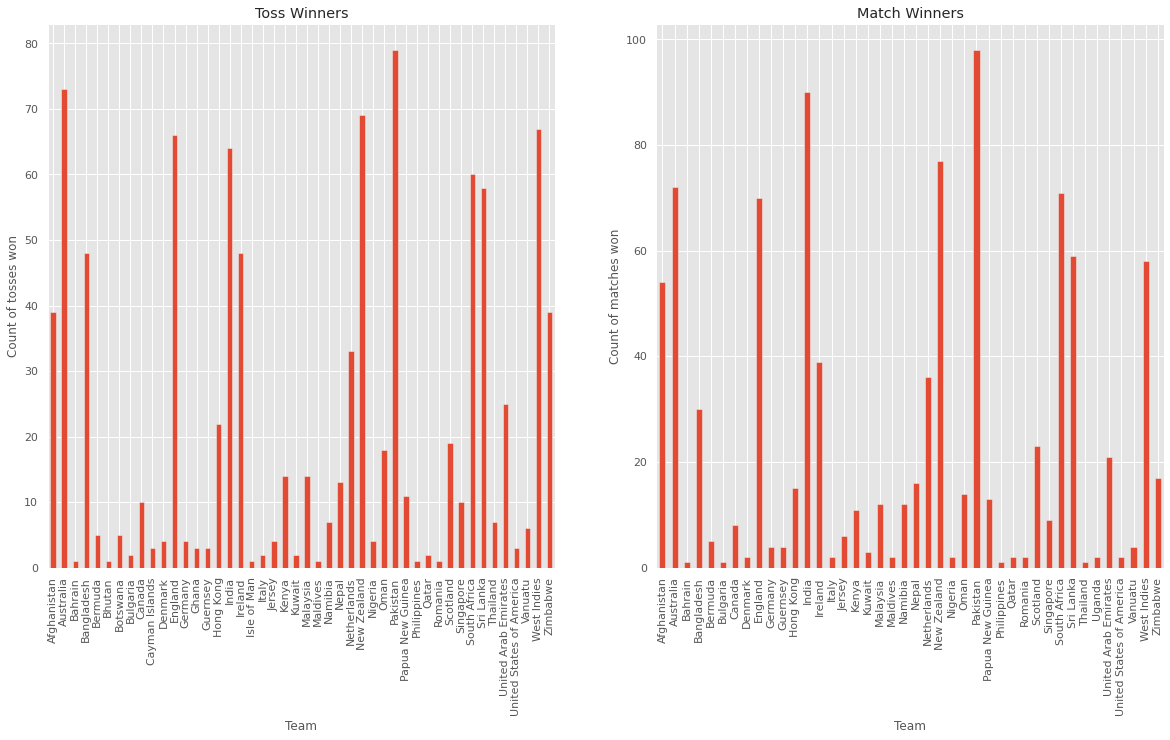

In [667]:
# Now plot toss & match winner together

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of tosses won')
ax1.set_title("Toss Winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [668]:
batting_first = t2[t2['toss_decision'] == 'bat']
batting_first.head(10)

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
5,2006-02-24,New Wanderers Stadium,Johannesburg,South Africa,South Africa,Australia,South Africa,bat,M Erasmus,KH Hurter,South Africa
6,2006-06-15,The Rose Bowl,Southampton,England,England,Sri Lanka,Sri Lanka,bat,IJ Gould,NJ Llong,Sri Lanka
7,2006-08-28,County Ground,Bristol,England,England,Pakistan,England,bat,PJ Hartley,NJ Llong,Pakistan
8,2006-12-01,New Wanderers Stadium,Johannesburg,South Africa,South Africa,India,South Africa,bat,IL Howell,BG Jerling,India
9,2006-12-22,Westpac Stadium,Wellington,New Zealand,New Zealand,Sri Lanka,New Zealand,bat,AL Hill,EA Watkin,Sri Lanka
11,2007-01-09,Sydney Cricket Ground,Sydney,Australia,Australia,England,Australia,bat,PD Parker,RL Parry,Australia
12,2007-06-28,Kennington Oval,London,England,England,West Indies,West Indies,bat,PJ Hartley,NJ Llong,West Indies


In [669]:
bat_first = batting_first['toss_winner'].value_counts(sort=True).sort_index()
match_wins = batting_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

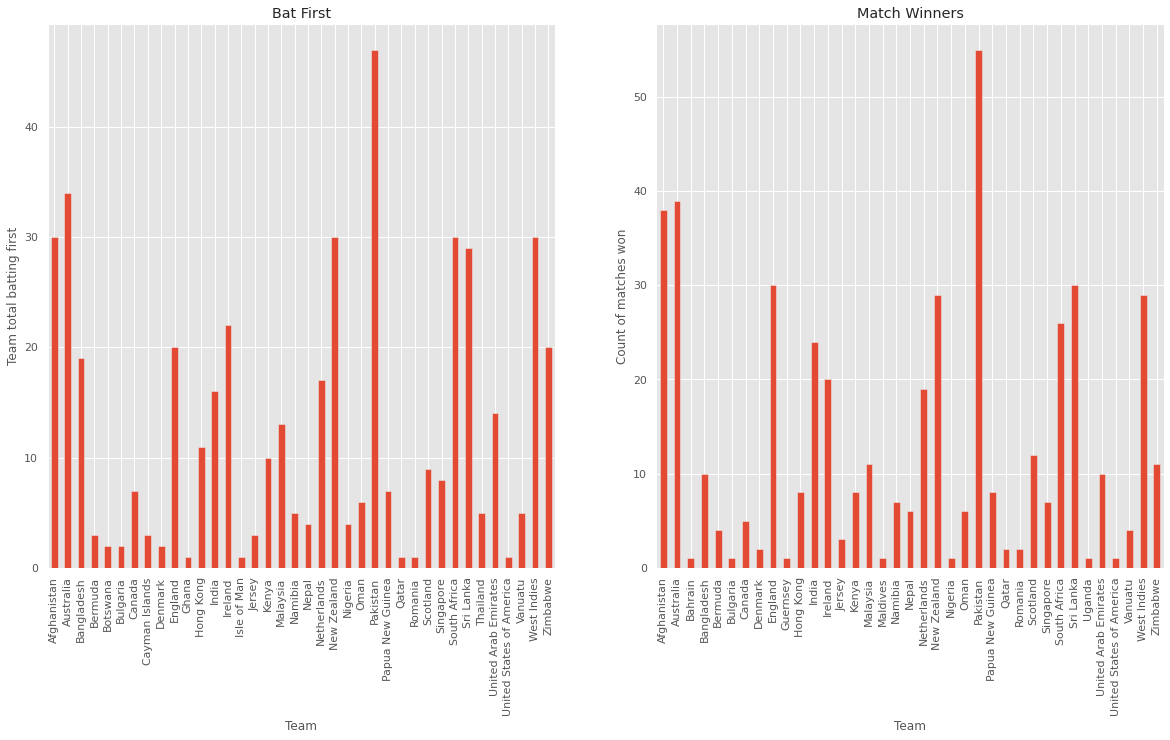

In [670]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team total batting first')
ax1.set_title("Bat First")
bat_first.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [671]:
bowling_first = t2[t2['toss_decision'] == 'field']

In [672]:
bowl_first = bowling_first['toss_winner'].value_counts(sort=True).sort_index()
match_wins = bowling_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

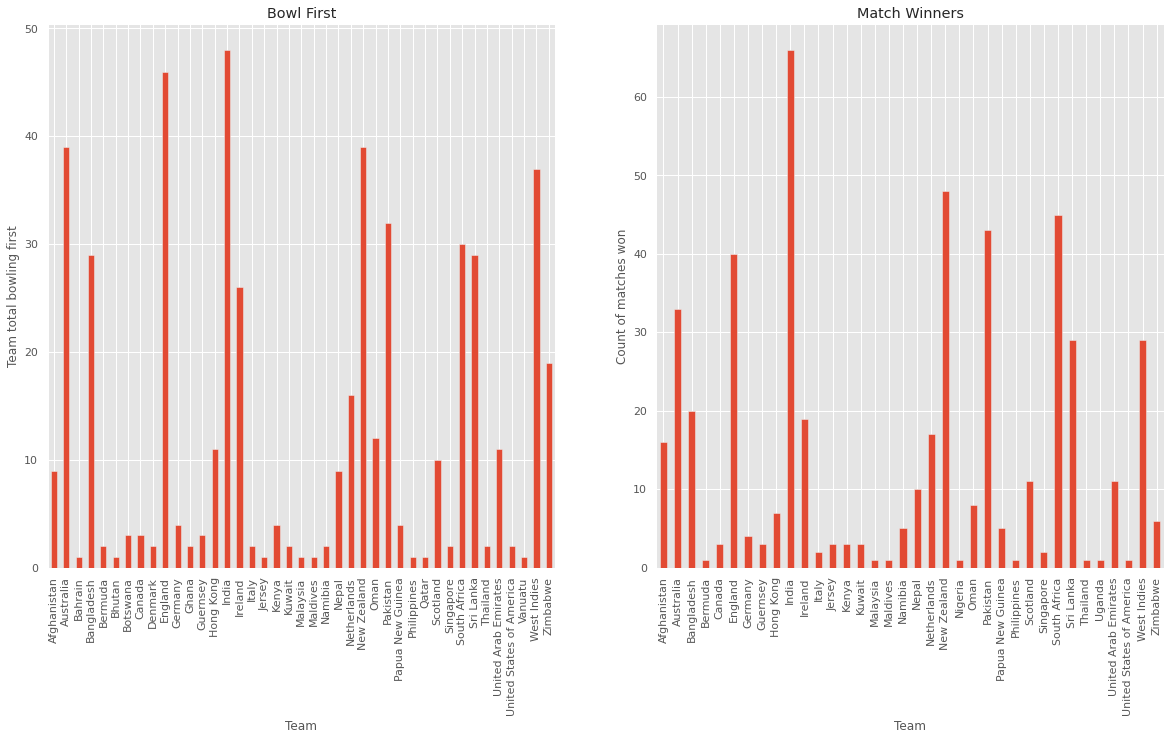

In [673]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team total bowling first')
ax1.set_title("Bowl First")
bowl_first.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [674]:
batting_first['match_winner'].value_counts().sort_index()

Afghanistan                 38
Australia                   39
Bahrain                      1
Bangladesh                  10
Bermuda                      4
Bulgaria                     1
Canada                       5
Denmark                      2
England                     30
Guernsey                     1
Hong Kong                    8
India                       24
Ireland                     20
Jersey                       3
Kenya                        8
Malaysia                    11
Maldives                     1
Namibia                      7
Nepal                        6
Netherlands                 19
New Zealand                 29
Nigeria                      1
Oman                         6
Pakistan                    55
Papua New Guinea             8
Qatar                        2
Romania                      2
Scotland                    12
Singapore                    7
South Africa                26
Sri Lanka                   30
Uganda                       1
United A

In [675]:
bowling_first['match_winner'].value_counts().sort_index()

Afghanistan                 16
Australia                   33
Bangladesh                  20
Bermuda                      1
Canada                       3
England                     40
Germany                      4
Guernsey                     3
Hong Kong                    7
India                       66
Ireland                     19
Italy                        2
Jersey                       3
Kenya                        3
Kuwait                       3
Malaysia                     1
Maldives                     1
Namibia                      5
Nepal                       10
Netherlands                 17
New Zealand                 48
Nigeria                      1
Oman                         8
Pakistan                    43
Papua New Guinea             5
Philippines                  1
Scotland                    11
Singapore                    2
South Africa                45
Sri Lanka                   29
Thailand                     1
Uganda                       1
United A

In [676]:
home_team_one = t2[(t2.home_team == t2.team_1) | (t2.home_team == t2.team_2)]
home_team_one.head()

,dates,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005-02-17,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005-06-13,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005-10-21,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006-01-09,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006-02-16,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand


In [677]:
home_team_onee = home_team_one['team_1'].value_counts(sort=True).sort_index()
home_team_twoo = home_team_one['team_2'].value_counts(sort=True).sort_index()
match_wins = bowling_first['match_winner'].value_counts(sort=True).sort_index()

Text(0.5, 1.0, 'Match Winners')

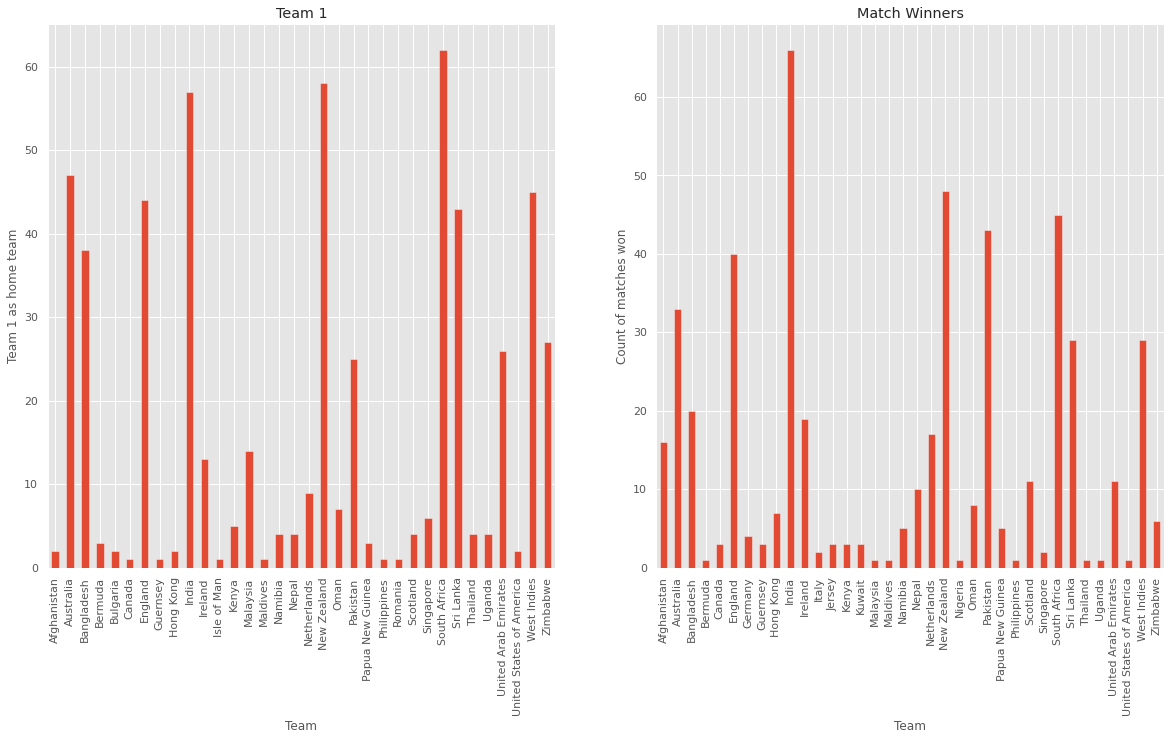

In [678]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team 1 as home team')
ax1.set_title("Team 1")
home_team_onee.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

Text(0.5, 1.0, 'Match Winners')

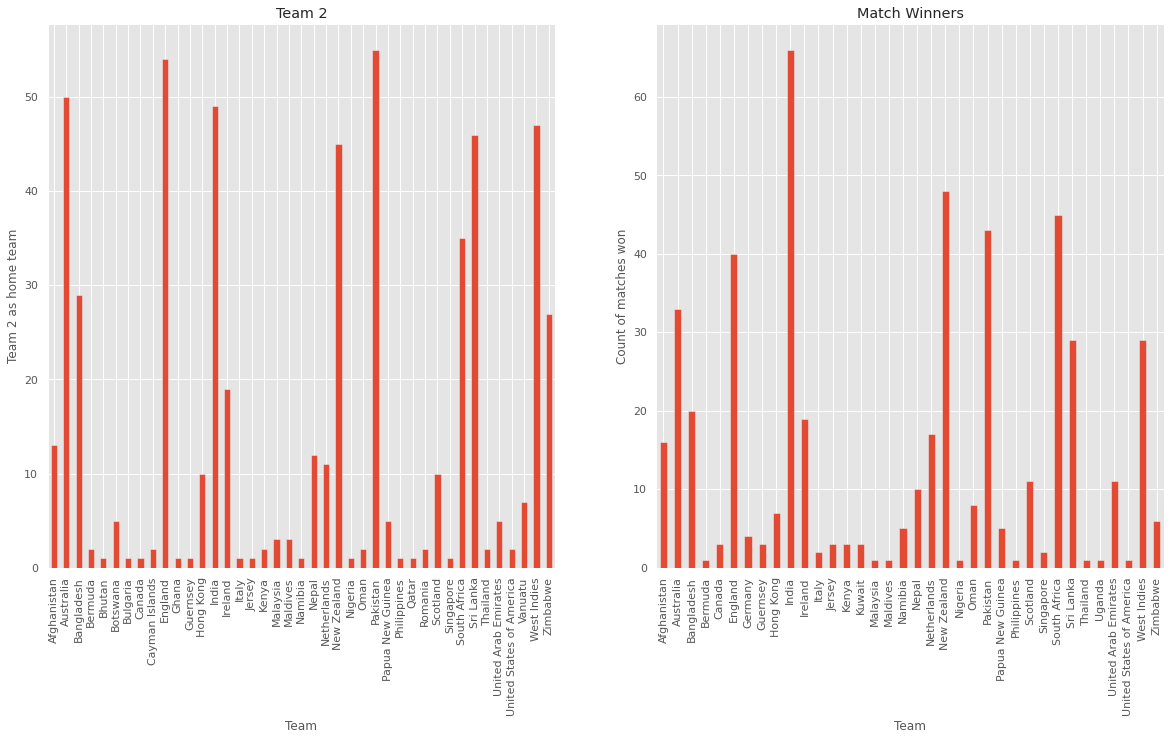

In [679]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Team 2 as home team')
ax1.set_title("Team 2")
home_team_twoo.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind='bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of matches won')
ax2.set_title("Match Winners")

In [680]:
t2['venue'].value_counts().sort_index()

AMI Stadium                                               3
Adelaide Oval                                             5
Al Amerat Cricket Ground Oman Cricket Ministry Turf 1    19
Al Amerat Cricket Ground Oman Cricket Ministry Turf 2     3
Amini Park                                                6
                                                         ..
Western Australia Cricket Association Ground              2
Westpac Stadium                                          14
White Hill Field                                          8
Windsor Park                                              2
Zahur Ahmed Chowdhury Stadium                            20
Name: venue, Length: 138, dtype: int64

In [681]:
t2['city'].sort_values().unique()

array(['Abu Dhabi', 'Adelaide', 'Ahmedabad', 'Al Amarat', 'Amstelveen',
       'Antigua', 'Auckland', 'Bangalore', 'Bangkok', 'Barbados',
       'Basseterre', 'Belfast', 'Birmingham', 'Bloemfontein', 'Bready',
       'Brisbane', 'Bristol', 'Bulawayo', 'Canberra', 'Cape Town',
       'Cardiff', 'Carrara', 'Castel', 'Centurion', 'Chandigarh',
       'Chennai', 'Chester-le-Street', 'Chittagong', 'Christchurch',
       'Colombo', 'Coolidge', 'Cuttack', 'Dehradun', 'Delhi', 'Derry',
       'Deventer', 'Dhaka', 'Dharamsala', 'Dominica', 'Dubai', 'Dublin',
       'Dunedin', 'Durban', 'East London', 'Edinburgh', 'Fatullah',
       'Greater Noida', 'Gros Islet', 'Guwahati', 'Guyana', 'Hambantota',
       'Hamilton', 'Harare', 'Hobart', 'Hong Kong', 'Hyderabad', 'Indore',
       'Jamaica', 'Johannesburg', 'Kampala', 'Kandy', 'Kanpur', 'Karachi',
       'Khulna', 'Kimberley', 'King City', 'Kirtipur', 'Kolkata',
       'Kuala Lumpur', 'Lahore', 'Lauderhill', 'London', 'Londonderry',
       'Luckno

In [682]:
t2['toss_decision'].value_counts().sort_index()

bat      472
field    499
Name: toss_decision, dtype: int64

In [683]:
t2['umpire_1'].value_counts().sort_index()

A Kapa            3
A Louw            3
A Paleker        19
AG Wharf          6
AJ Neill          2
                 ..
V Kalidas        11
VA Kulkarni      10
Vinod Babu        2
WPM van Liemt     1
Zaidan Taha       2
Name: umpire_1, Length: 147, dtype: int64

In [684]:
t2['umpire_2'].value_counts().sort_index()

A Begg            1
A Louw            1
A Natarajan       2
A Paleker         1
AG Wharf         14
                 ..
VK Sharma         2
Vinod Babu        3
WPM van Liemt     2
WR Knights       23
Zameer Haider    12
Name: umpire_2, Length: 152, dtype: int64

In [685]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 83.6+ KB


In [686]:
t2 = t2.drop_duplicates(keep = 'first')
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dates          971 non-null    object
 1   venue          971 non-null    object
 2   city           971 non-null    object
 3   home_team      971 non-null    object
 4   team_1         971 non-null    object
 5   team_2         971 non-null    object
 6   toss_winner    971 non-null    object
 7   toss_decision  971 non-null    object
 8   umpire_1       971 non-null    object
 9   umpire_2       971 non-null    object
 10  match_winner   971 non-null    object
dtypes: object(11)
memory usage: 91.0+ KB


In [687]:
t2['dates'] = pd.to_datetime(t2['dates'])
t2['year'] = t2['dates'].dt.year
t2['month'] = t2['dates'].dt.month
t2['day'] = t2['dates'].dt.day
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dates          971 non-null    datetime64[ns]
 1   venue          971 non-null    object        
 2   city           971 non-null    object        
 3   home_team      971 non-null    object        
 4   team_1         971 non-null    object        
 5   team_2         971 non-null    object        
 6   toss_winner    971 non-null    object        
 7   toss_decision  971 non-null    object        
 8   umpire_1       971 non-null    object        
 9   umpire_2       971 non-null    object        
 10  match_winner   971 non-null    object        
 11  year           971 non-null    int64         
 12  month          971 non-null    int64         
 13  day            971 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 113.8+ KB


In [688]:
print(min(t2['dates']))
print(max(t2['dates']))

2005-02-17 00:00:00
2021-03-20 00:00:00


In [689]:
t3 = t2
t3 = t3.drop(['dates'], axis = 1)
t3

,venue,city,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner,year,month,day
0,Eden Park,Auckland,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia,2005,2,17
1,The Rose Bowl,Southampton,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England,2005,6,13
2,New Wanderers Stadium,Johannesburg,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand,2005,10,21
3,Brisbane Cricket Ground,Brisbane,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia,2006,1,9
4,Eden Park,Auckland,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand,2006,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,Zimbabwe,field,Aleem Dar,Izatullah Safi,Afghanistan,2021,3,17
967,Narendra Modi Stadium,Ahmedabad,India,India,England,England,field,KN Ananthapadmanabhan,Nitin Menon,India,2021,3,18
968,Sheikh Zayed Stadium,Abu Dhabi,none,Afghanistan,Zimbabwe,Afghanistan,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan,2021,3,19
969,Narendra Modi Stadium,Ahmedabad,India,India,England,England,field,AK Chaudhary,Nitin Menon,India,2021,3,20


In [690]:
t3.columns

Index(['venue', 'city', 'home_team', 'team_1', 'team_2', 'toss_winner',
       'toss_decision', 'umpire_1', 'umpire_2', 'match_winner', 'year',
       'month', 'day'],
      dtype='object')

In [691]:
t3 = t3[['year', 'month', 'day', 'city', 'venue', 'home_team', 'team_1', 'team_2', 'toss_winner',
       'toss_decision', 'umpire_1', 'umpire_2', 'match_winner']]
t3

,year,month,day,city,venue,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005,2,17,Auckland,Eden Park,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005,6,13,Southampton,The Rose Bowl,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005,10,21,Johannesburg,New Wanderers Stadium,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006,1,9,Brisbane,Brisbane Cricket Ground,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006,2,16,Auckland,Eden Park,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,2021,3,17,Abu Dhabi,Sheikh Zayed Stadium,none,Afghanistan,Zimbabwe,Zimbabwe,field,Aleem Dar,Izatullah Safi,Afghanistan
967,2021,3,18,Ahmedabad,Narendra Modi Stadium,India,India,England,England,field,KN Ananthapadmanabhan,Nitin Menon,India
968,2021,3,19,Abu Dhabi,Sheikh Zayed Stadium,none,Afghanistan,Zimbabwe,Afghanistan,bat,Ahmed Shah Durrani,Aleem Dar,Afghanistan
969,2021,3,20,Ahmedabad,Narendra Modi Stadium,India,India,England,England,field,AK Chaudhary,Nitin Menon,India


In [692]:
t3.columns

Index(['year', 'month', 'day', 'city', 'venue', 'home_team', 'team_1',
       'team_2', 'toss_winner', 'toss_decision', 'umpire_1', 'umpire_2',
       'match_winner'],
      dtype='object')

In [693]:
team1 = t3['team_1'].sort_values().unique()
team1

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Iran', 'Ireland', 'Isle of Man', 'Italy', 'Jersey',
       'Kenya', 'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania',
       'Saudi Arabia', 'Scotland', 'Singapore', 'South Africa',
       'Sri Lanka', 'Thailand', 'Uganda', 'United Arab Emirates',
       'United States of America', 'West Indies', 'Zimbabwe'],
      dtype=object)

In [694]:
t3['team_2'].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Ireland', 'Italy', 'Jersey', 'Kenya', 'Kuwait',
       'Malaysia', 'Maldives', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [695]:
t3['toss_winner'].sort_values().unique()

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bhutan', 'Botswana', 'Bulgaria', 'Canada', 'Cayman Islands',
       'Denmark', 'England', 'Germany', 'Ghana', 'Guernsey', 'Hong Kong',
       'India', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Kenya',
       'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [696]:
winner = t3['match_winner'].sort_values().unique()
winner

array(['Afghanistan', 'Australia', 'Bahrain', 'Bangladesh', 'Bermuda',
       'Bulgaria', 'Canada', 'Denmark', 'England', 'Germany', 'Guernsey',
       'Hong Kong', 'India', 'Ireland', 'Italy', 'Jersey', 'Kenya',
       'Kuwait', 'Malaysia', 'Maldives', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nigeria', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Qatar', 'Romania', 'Scotland',
       'Singapore', 'South Africa', 'Sri Lanka', 'Thailand', 'Uganda',
       'United Arab Emirates', 'United States of America', 'Vanuatu',
       'West Indies', 'Zimbabwe'], dtype=object)

In [697]:
t4 = t3
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           971 non-null    int64 
 1   month          971 non-null    int64 
 2   day            971 non-null    int64 
 3   city           971 non-null    object
 4   venue          971 non-null    object
 5   home_team      971 non-null    object
 6   team_1         971 non-null    object
 7   team_2         971 non-null    object
 8   toss_winner    971 non-null    object
 9   toss_decision  971 non-null    object
 10  umpire_1       971 non-null    object
 11  umpire_2       971 non-null    object
 12  match_winner   971 non-null    object
dtypes: int64(3), object(10)
memory usage: 106.2+ KB


In [698]:
t4['team_1'].nunique()

48

In [699]:
t4['team_2'].nunique()

46

In [700]:
t4['toss_winner'].nunique()

46

In [701]:
t4['match_winner'].nunique()

42

In [702]:
t4['match_winner'].value_counts()

Pakistan                    98
India                       90
New Zealand                 77
Australia                   72
South Africa                71
England                     70
Sri Lanka                   59
West Indies                 58
Afghanistan                 54
Ireland                     39
Netherlands                 36
Bangladesh                  30
Scotland                    23
United Arab Emirates        21
Zimbabwe                    17
Nepal                       16
Hong Kong                   15
Oman                        14
Papua New Guinea            13
Namibia                     12
Malaysia                    12
Kenya                       11
Singapore                    9
Canada                       8
Jersey                       6
Bermuda                      5
Germany                      4
Vanuatu                      4
Guernsey                     4
Kuwait                       3
Uganda                       2
Denmark                      2
Nigeria 

In [703]:
t4['home_team'].value_counts()

none                    405
New Zealand              70
South Africa             62
India                    51
England                  48
Australia                46
West Indies              43
Sri Lanka                42
Bangladesh               38
United Arab Emirates     27
Zimbabwe                 24
Pakistan                 18
Ireland                  16
Malaysia                 15
Netherlands              12
Oman                      7
Singapore                 6
Scotland                  5
Bermuda                   5
Kenya                     5
Namibia                   4
Uganda                    4
Thailand                  4
Papua New Guinea          4
Romania                   3
Nepal                     3
Hong Kong                 2
Guernsey                  2
Name: home_team, dtype: int64

In [704]:
neverwon = np.setdiff1d(team1, winner)
neverwon

array(['Bhutan', 'Botswana', 'Cayman Islands', 'Ghana', 'Iran',
       'Isle of Man', 'Saudi Arabia'], dtype=object)

In [705]:
## Creating Dictionaries
#
#team_encodings = {
#    'Pakistan'                    : 50,
#    'India'                       : 49,
#    'New Zealand'                 : 48,
#    'Australia'                   : 47,
#    'South Africa'                : 46,
#    'England'                     : 45,
#    'Sri Lanka'                   : 44,
#    'West Indies'                 : 43,
#    'Afghanistan'                 : 42,
#    'Ireland'                     : 41,
#    'Netherlands'                 : 40,
#    'Bangladesh'                  : 39,
#    'Scotland'                    : 38,
#    'United Arab Emirates'        : 37,
#    'Zimbabwe'                    : 36,
#    'Nepal'                       : 35,
#    'Hong Kong'                   : 34,
#    'Oman'                        : 33,
#    'Papua New Guinea'            : 32,
#    'Malaysia'                    : 31,
#    'Namibia'                     : 30,
#    'Kenya'                       : 29,
#    'Singapore'                   : 28,
#    'Canada'                      : 27,
#    'Jersey'                      : 26,
#    'Bermuda'                     : 25,
#    'Germany'                     : 24,
#    'Guernsey'                    : 23,
#    'Vanuatu'                     : 22,
#    'Kuwait'                      : 21,
#    'Qatar'                       : 20,
#    'Denmark'                     : 19,
#    'Romania'                     : 18,
#    'Italy'                       : 17,
#    'Maldives'                    : 16,
#    'Uganda'                      : 15,
#    'Nigeria'                     : 14,
#    'United States of America'    : 13,
#    'Philippines'                 : 12,
#    'Thailand'                    : 11,    
#    'Bahrain'                     : 10,    
#    'Bulgaria'                    : 9,
#    'Norway'                      : 8,
#    'Bhutan'                      : 7,
#    'Botswana'                    : 6,
#    'Cayman Islands'              : 5,
#    'Ghana'                       : 4,
#    'Iran'                        : 3,
#    'Isle of Man'                 : 2,
#    'Saudi Arabia'                : 1,
#    'none'                        : 0
#}
#
#team_encode_dict = {
#    'all_teams': team_encodings,
#    'team_1': team_encodings,
#    'team_2': team_encodings,
#    'home_team': team_encodings,
#    'toss_winner': team_encodings,
#    'match_winner': team_encodings
#}
#t4.replace(team_encode_dict, inplace=True)
#t4

In [706]:
#print(team_encode_dict['all_teams'])

In [707]:
t4['team_1'].value_counts()

New Zealand                 81
Australia                   80
India                       77
England                     70
South Africa                69
Afghanistan                 62
Pakistan                    57
Bangladesh                  56
West Indies                 51
Sri Lanka                   51
Ireland                     43
Netherlands                 28
Zimbabwe                    28
United Arab Emirates        27
Hong Kong                   27
Canada                      19
Malaysia                    17
Kenya                       16
Oman                        10
Nepal                       10
Namibia                     10
Bermuda                     10
Scotland                     7
Singapore                    6
Denmark                      5
Kuwait                       5
Papua New Guinea             5
Uganda                       4
Thailand                     4
Guernsey                     4
Jersey                       3
Maldives                     3
Philippi

In [708]:
t4['team_2'].value_counts()

Pakistan                    100
West Indies                  78
Sri Lanka                    77
India                        63
England                      61
New Zealand                  61
South Africa                 57
Australia                    56
Zimbabwe                     49
Ireland                      43
Scotland                     42
Netherlands                  36
Bangladesh                   35
Nepal                        21
Oman                         21
United Arab Emirates         18
Afghanistan                  16
Papua New Guinea             15
Hong Kong                    15
Kenya                        12
Vanuatu                       9
Singapore                     9
Jersey                        7
Nigeria                       7
Namibia                       6
United States of America      6
Qatar                         5
Botswana                      5
Malaysia                      5
Cayman Islands                4
Norway                        4
Maldives

In [709]:
t4['home_team'].value_counts()

none                    405
New Zealand              70
South Africa             62
India                    51
England                  48
Australia                46
West Indies              43
Sri Lanka                42
Bangladesh               38
United Arab Emirates     27
Zimbabwe                 24
Pakistan                 18
Ireland                  16
Malaysia                 15
Netherlands              12
Oman                      7
Singapore                 6
Scotland                  5
Bermuda                   5
Kenya                     5
Namibia                   4
Uganda                    4
Thailand                  4
Papua New Guinea          4
Romania                   3
Nepal                     3
Hong Kong                 2
Guernsey                  2
Name: home_team, dtype: int64

In [710]:
t4['toss_winner'].value_counts()

Pakistan                    79
Australia                   73
New Zealand                 69
West Indies                 67
England                     66
India                       64
South Africa                60
Sri Lanka                   58
Bangladesh                  48
Ireland                     48
Afghanistan                 39
Zimbabwe                    39
Netherlands                 33
United Arab Emirates        25
Hong Kong                   22
Scotland                    19
Oman                        18
Malaysia                    14
Kenya                       14
Nepal                       13
Papua New Guinea            11
Singapore                   10
Canada                      10
Thailand                     7
Namibia                      7
Vanuatu                      6
Botswana                     5
Bermuda                      5
Denmark                      4
Nigeria                      4
Jersey                       4
Germany                      4
Ghana   

In [711]:
t4['match_winner'].value_counts()

Pakistan                    98
India                       90
New Zealand                 77
Australia                   72
South Africa                71
England                     70
Sri Lanka                   59
West Indies                 58
Afghanistan                 54
Ireland                     39
Netherlands                 36
Bangladesh                  30
Scotland                    23
United Arab Emirates        21
Zimbabwe                    17
Nepal                       16
Hong Kong                   15
Oman                        14
Papua New Guinea            13
Namibia                     12
Malaysia                    12
Kenya                       11
Singapore                    9
Canada                       8
Jersey                       6
Bermuda                      5
Germany                      4
Vanuatu                      4
Guernsey                     4
Kuwait                       3
Uganda                       2
Denmark                      2
Nigeria 

In [712]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           971 non-null    int64 
 1   month          971 non-null    int64 
 2   day            971 non-null    int64 
 3   city           971 non-null    object
 4   venue          971 non-null    object
 5   home_team      971 non-null    object
 6   team_1         971 non-null    object
 7   team_2         971 non-null    object
 8   toss_winner    971 non-null    object
 9   toss_decision  971 non-null    object
 10  umpire_1       971 non-null    object
 11  umpire_2       971 non-null    object
 12  match_winner   971 non-null    object
dtypes: int64(3), object(10)
memory usage: 106.2+ KB


In [713]:
#from sklearn.preprocessing import LabelEncoder
#
#ftr_list = ['city', 'venue', 'toss_decision', 'umpire_1', 'umpire_2']


#encoder = LabelEncoder()
#for ftr in ftr_list:
#    t4[ftr] = encoder.fit_transform(t4[ftr])
#    print(encoder.classes_)
#
#t4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47587a8ad0>,
      dtype=object)

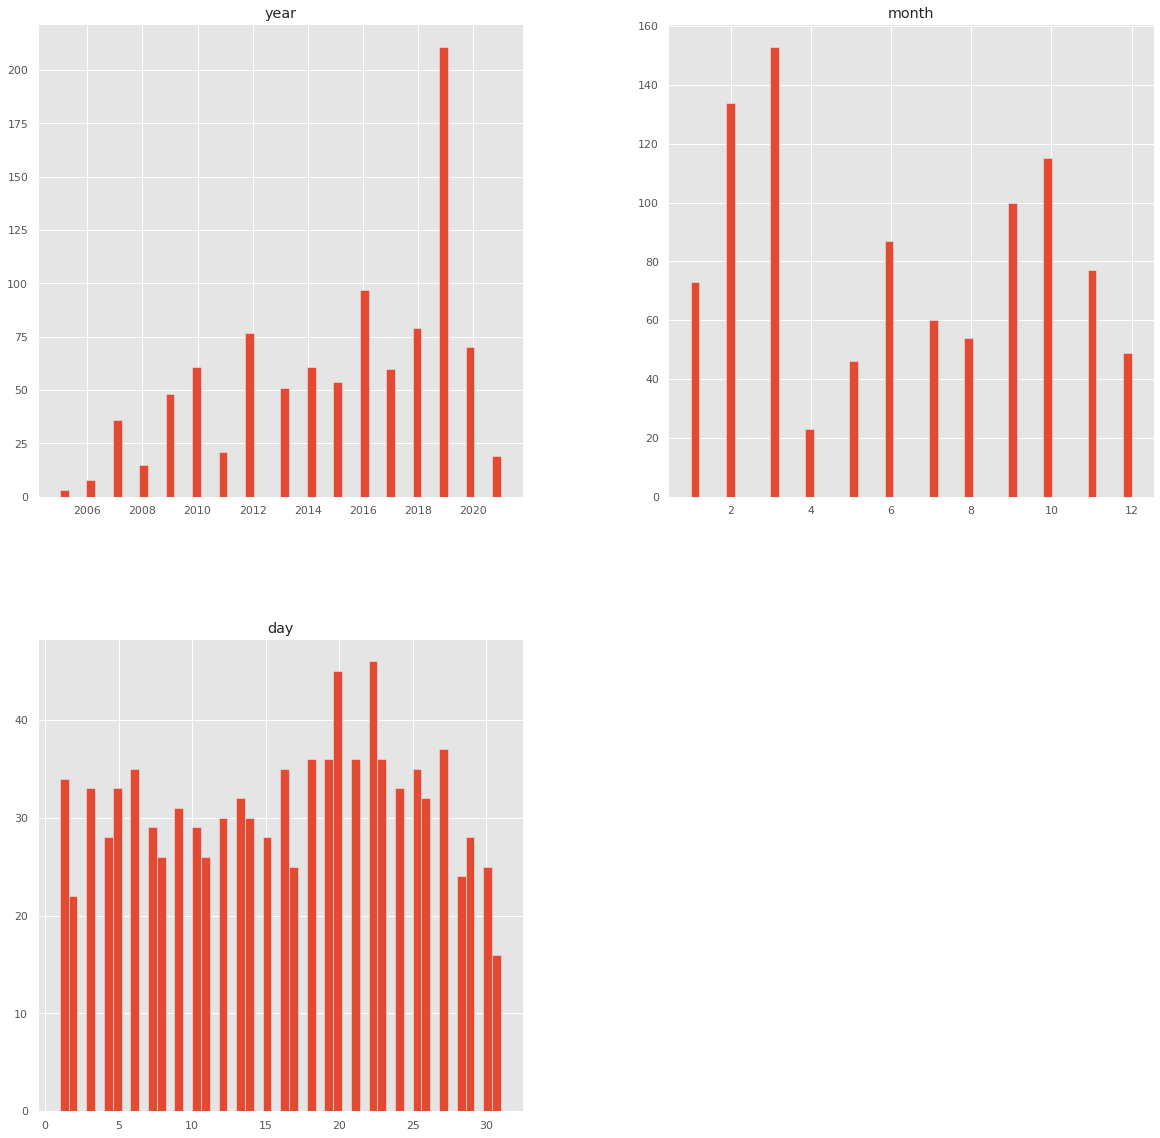

In [714]:
t4.hist(bins = 50, figsize = (20,20))

In [715]:
t5 = t4
t5.head()

,year,month,day,city,venue,home_team,team_1,team_2,toss_winner,toss_decision,umpire_1,umpire_2,match_winner
0,2005,2,17,Auckland,Eden Park,New Zealand,New Zealand,Australia,Australia,bat,BF Bowden,AL Hill,Australia
1,2005,6,13,Southampton,The Rose Bowl,England,England,Australia,England,bat,NJ Llong,JW Lloyds,England
2,2005,10,21,Johannesburg,New Wanderers Stadium,South Africa,South Africa,New Zealand,New Zealand,field,IL Howell,BG Jerling,New Zealand
3,2006,1,9,Brisbane,Brisbane Cricket Ground,Australia,Australia,South Africa,Australia,bat,BNJ Oxenford,RL Parry,Australia
4,2006,2,16,Auckland,Eden Park,New Zealand,West Indies,New Zealand,New Zealand,field,BF Bowden,AL Hill,New Zealand


In [716]:
t5 = t5.drop(['umpire_1', 'umpire_2'], axis = 1)

In [717]:
col = pd.get_dummies(t5.home_team, prefix='home_team')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['home_team'], axis=1)

col = pd.get_dummies(t5.team_1, prefix='team_1')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['team_1'], axis=1)

col = pd.get_dummies(t5.team_2, prefix='team_2')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['team_2'], axis=1)

col = pd.get_dummies(t5.toss_winner, prefix='toss_winner')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['toss_winner'], axis=1)


col = pd.get_dummies(t5.city, prefix='city')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['city'], axis=1)

col = pd.get_dummies(t5.venue, prefix='venue')
t5 = pd.concat([t5, col], axis=1)
t5 = t5.drop(['venue'], axis=1)




t5.head()

,year,month,day,toss_decision,match_winner,home_team_Australia,home_team_Bangladesh,home_team_Bermuda,home_team_England,home_team_Guernsey,home_team_Hong Kong,home_team_India,home_team_Ireland,home_team_Kenya,home_team_Malaysia,home_team_Namibia,home_team_Nepal,home_team_Netherlands,home_team_New Zealand,home_team_Oman,home_team_Pakistan,home_team_Papua New Guinea,home_team_Romania,home_team_Scotland,home_team_Singapore,...,venue_Stadium Australia,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Sydney Cricket Ground,venue_Sylhet International Cricket Stadium,venue_Terdthai Cricket Ground,venue_The Rose Bowl,venue_The Village,venue_The Wanderers Stadium,venue_Tolerance Oval,venue_Tony Ireland Stadium,venue_Trent Bridge,venue_Tribhuvan University International Cricket Ground,venue_United Cricket Club Ground,venue_University Oval,venue_VRA Ground,venue_Vidarbha Cricket Association Stadium,venue_Wanderers Cricket Ground,venue_Wankhede Stadium,venue_Warner Park,venue_Western Australia Cricket Association Ground,venue_Westpac Stadium,venue_White Hill Field,venue_Windsor Park,venue_Zahur Ahmed Chowdhury Stadium
0,2005,2,17,bat,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2005,6,13,bat,England,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2005,10,21,field,New Zealand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2006,1,9,bat,Australia,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,2,16,field,New Zealand,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [718]:
t5['toss_decision'] = t5['toss_decision'].replace('bat', 1)
t5['toss_decision'] = t5['toss_decision'].replace('field', 0)

In [719]:
#from sklearn.preprocessing import LabelEncoder
#
#ftr_list = ['city', 'venue', 'toss_decision', 'umpire_1', 'umpire_2']
#encoder = LabelEncoder()
#for ftr in ftr_list:
#    t4[ftr] = encoder.fit_transform(t4[ftr])
#    print(encoder.classes_)
#
#t4

In [720]:
t5.columns.tolist()

['year',
 'month',
 'day',
 'toss_decision',
 'match_winner',
 'home_team_Australia',
 'home_team_Bangladesh',
 'home_team_Bermuda',
 'home_team_England',
 'home_team_Guernsey',
 'home_team_Hong Kong',
 'home_team_India',
 'home_team_Ireland',
 'home_team_Kenya',
 'home_team_Malaysia',
 'home_team_Namibia',
 'home_team_Nepal',
 'home_team_Netherlands',
 'home_team_New Zealand',
 'home_team_Oman',
 'home_team_Pakistan',
 'home_team_Papua New Guinea',
 'home_team_Romania',
 'home_team_Scotland',
 'home_team_Singapore',
 'home_team_South Africa',
 'home_team_Sri Lanka',
 'home_team_Thailand',
 'home_team_Uganda',
 'home_team_United Arab Emirates',
 'home_team_West Indies',
 'home_team_Zimbabwe',
 'home_team_none',
 'team_1_Afghanistan',
 'team_1_Australia',
 'team_1_Bahrain',
 'team_1_Bangladesh',
 'team_1_Bermuda',
 'team_1_Bhutan',
 'team_1_Botswana',
 'team_1_Bulgaria',
 'team_1_Canada',
 'team_1_Cayman Islands',
 'team_1_Denmark',
 'team_1_England',
 'team_1_Germany',
 'team_1_Ghana',

In [721]:
t5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Columns: 428 entries, year to venue_Zahur Ahmed Chowdhury Stadium
dtypes: int64(4), object(1), uint8(423)
memory usage: 446.6+ KB


In [722]:
# Confusion Matrix

import seaborn as sns
sns.set(rc={'figure.figsize': (20,20)})
ax = sns.heatmap(t5.corr(), annot=True)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4832473dd0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f483247f440> (for post_execute):


KeyboardInterrupt: ignored

In [723]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold and i!=j:
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [724]:
corr_columns = correlation(t5, 0.8)
corr_columns = list(dict.fromkeys(corr_columns))
corr_columns

['team_1_Bulgaria',
 'team_1_Malaysia',
 'team_1_Oman',
 'team_1_Singapore',
 'team_1_South Africa',
 'team_1_Thailand',
 'team_1_Uganda',
 'team_1_United Arab Emirates',
 'team_1_Zimbabwe',
 'team_2_Botswana',
 'team_2_Bulgaria',
 'team_2_Kuwait',
 'team_2_Romania',
 'toss_winner_Bahrain',
 'toss_winner_Bhutan',
 'toss_winner_Bulgaria',
 'toss_winner_Isle of Man',
 'toss_winner_Maldives',
 'toss_winner_Papua New Guinea',
 'toss_winner_Philippines',
 'toss_winner_Romania',
 'toss_winner_Vanuatu',
 'city_Harare',
 'city_Hong Kong',
 'city_Kirtipur',
 'city_Kuala Lumpur',
 'city_Moara Vlasiei',
 'city_Port Moresby',
 'city_Windhoek',
 'venue_Adelaide Oval',
 'venue_Al Amerat Cricket Ground Oman Cricket Ministry Turf 1',
 'venue_Amini Park',
 'venue_Arnos Vale Ground',
 'venue_Barabati Stadium',
 'venue_Barsapara Cricket Stadium',
 'venue_Bay Oval',
 'venue_Beausejour Stadium',
 'venue_Bellerive Oval',
 'venue_Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
 'venue_Boland P

In [725]:
X = t5.drop(['match_winner', 'year', 'month', 'day'], axis = 1)
y = t5['match_winner']

In [726]:
X.shape

(971, 424)

In [727]:
y.shape

(971,)

In [728]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# DecisionTreeClassifier

In [729]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
DecisionTreeClassifier(criterion='gini', splitter='best',
                       max_depth=None, min_samples_split=2, 
                       min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                       max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       class_weight=None, ccp_alpha=0.0
)

print(cross_val_score(decisiontree, X, y, cv=4))

[0.5308642  0.51851852 0.49382716 0.46694215]


In [730]:
decisiontree.fit(X_train, y_train)
predictions = decisiontree.predict(X_train)
score = decisiontree.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [731]:
predictions = decisiontree.predict(X_test)
score = decisiontree.score(X_test, y_test)
print(score) # Accuracy

0.522633744855967


In [732]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  2  0 ...  0  4  1]
 [ 0  0  0 ...  0  0  1]]


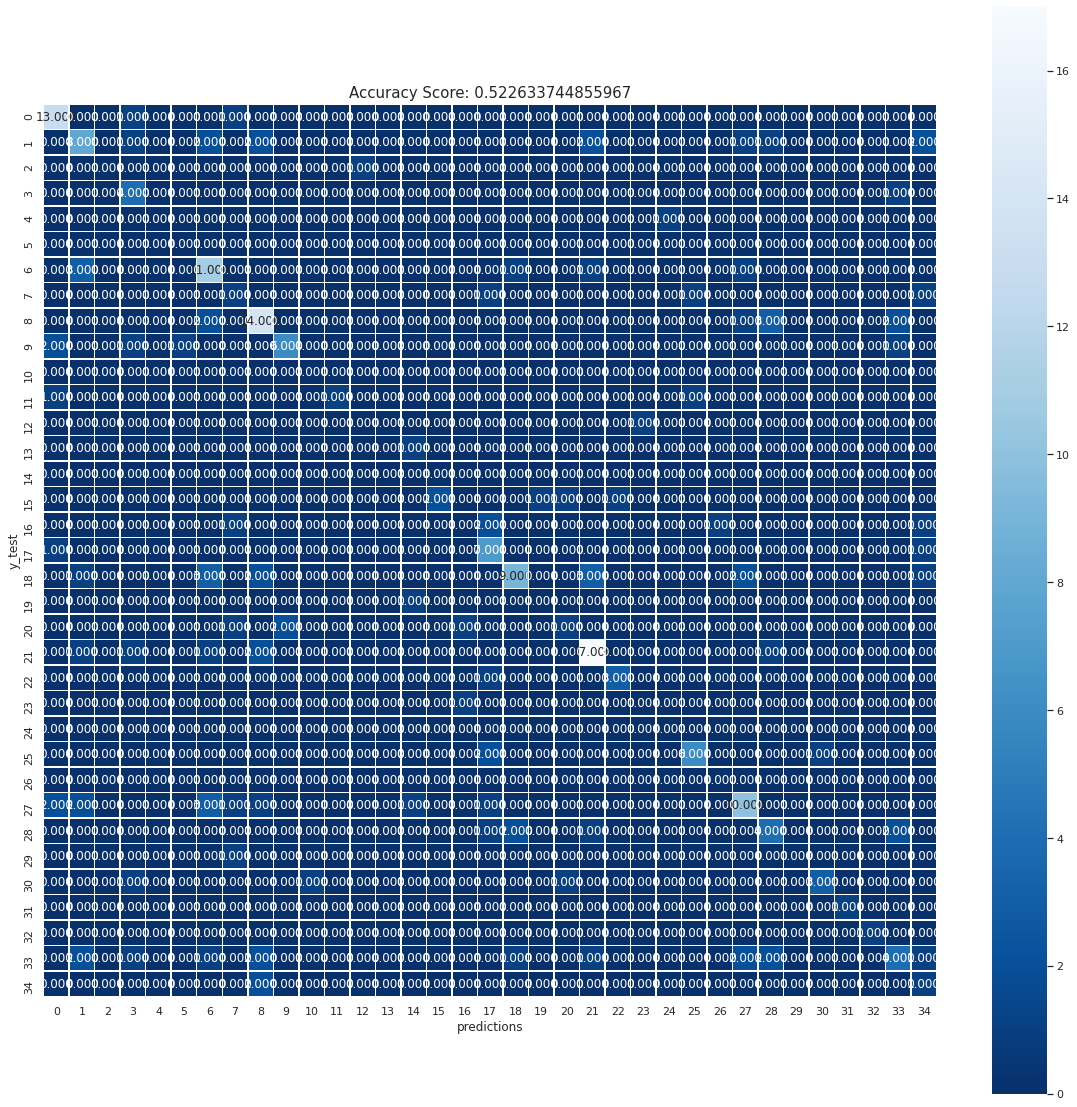

In [733]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [734]:
print(metrics.classification_report(y_test, predictions))
confusion_matrix(y_test, predictions).ravel()

                          precision    recall  f1-score   support

             Afghanistan       0.68      0.87      0.76        15
               Australia       0.47      0.42      0.44        19
                 Bahrain       0.00      0.00      0.00         1
              Bangladesh       0.40      0.80      0.53         5
                Bulgaria       0.00      0.00      0.00         1
                  Canada       0.00      0.00      0.00         0
                 England       0.48      0.65      0.55        17
               Hong Kong       0.17      0.25      0.20         4
                   India       0.56      0.64      0.60        22
                 Ireland       0.75      0.55      0.63        11
                  Jersey       0.00      0.00      0.00         0
                   Kenya       1.00      0.33      0.50         3
                  Kuwait       0.00      0.00      0.00         1
                Malaysia       0.00      0.00      0.00         1
         

array([13,  0,  0, ...,  0,  0,  1])

In [ ]:
#metrics.plot_roc_curve(decisiontree, X_test, y_test)  
#plt.show()

In [740]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

KeyError: ignored

# Random Forest

In [735]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
print(cross_val_score(randomforest, X, y, cv=3))

[0.54938272 0.55555556 0.53250774]


In [736]:
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_train)
score = randomforest.score(X_train, y_train)
print(score) # Accuracy 

0.9629120879120879


In [737]:
predictions = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
print(score) # Accuracy

0.6008230452674898


In [738]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  1  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  1]]


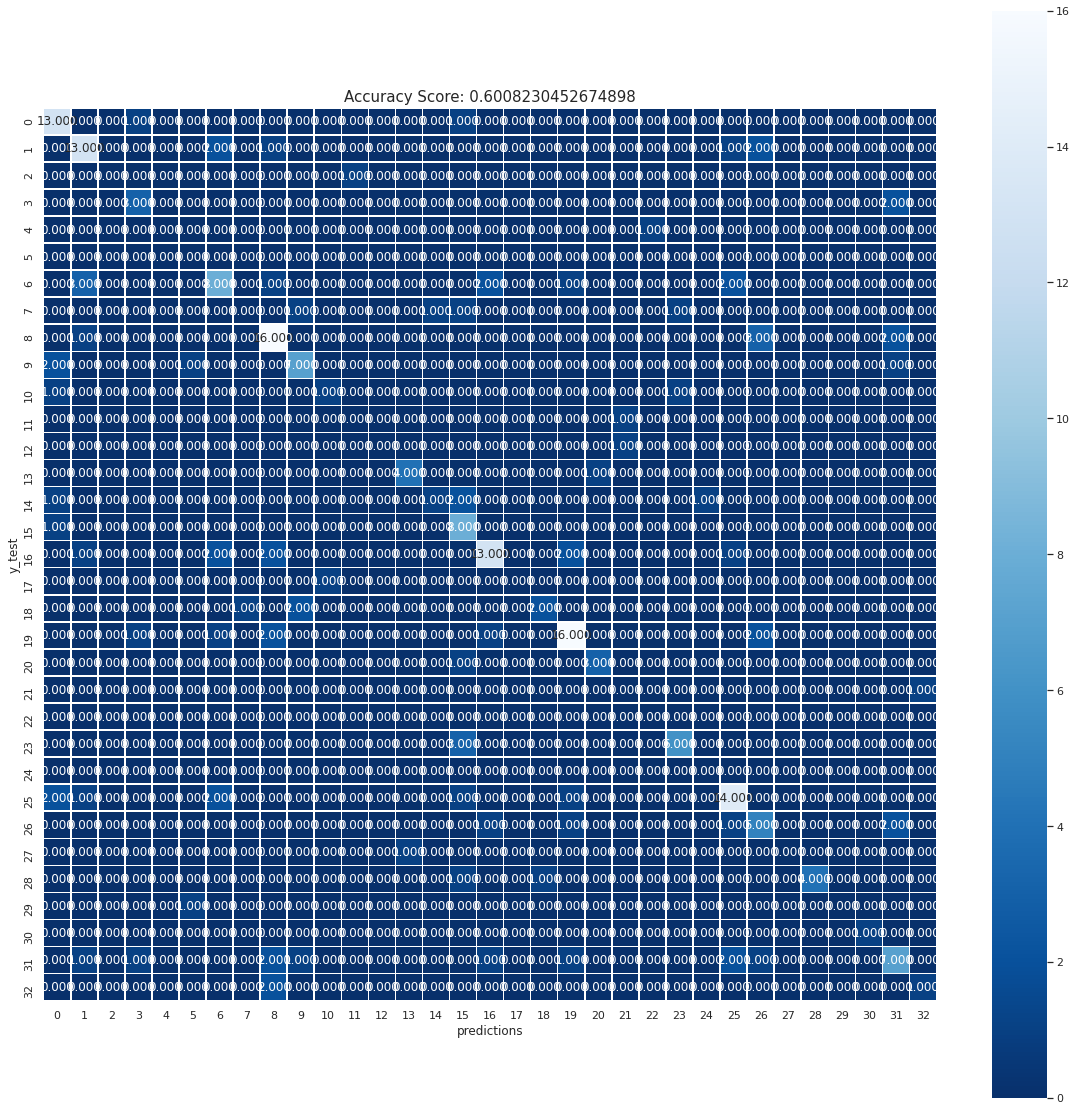

In [739]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
print(metrics.classification_report(y_test, predictions))
confusion_matrix(y_test, predictions).ravel()

In [ ]:
#metrics.plot_roc_curve(randomforest, X_test, y_test)  
#plt.show()

# Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
print(cross_val_score(neigh, X, y, cv=3))

# Model

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_train)
score = xgb.score(X_train, y_train)
print(score) # Accuracy 

In [ ]:
predictions = xgb.predict(X_test)
score = xgb.score(X_test, y_test)
print(score) # Accuracy

# SVM

In [ ]:
from sklearn import svm
supvm = svm.SVC(kernel='poly', degree=15)
print(cross_val_score(supvm, X, y, cv=3))

In [ ]:
supvm.fit(X_train, y_train)
predictions = supvm.predict(X_train)
score = supvm.score(X_train, y_train)
print(score) # Accuracy 

In [ ]:
predictions = supvm.predict(X_test)
score = supvm.score(X_test, y_test)
print(score) # Accuracy 

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('y_test');
plt.xlabel('predictions');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
print(metrics.classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)

# Prediction

In [ ]:
train_df, test_df = train_test_split(t4, test_size=0.25, random_state=42)

X_train = train_df.drop(['match_winner', 'year', 'month', 'day', 'umpire_1', 'umpire_2'], axis = 1)
X_test = test_df.drop(['match_winner', 'year', 'month', 'day', 'umpire_1', 'umpire_2'], axis = 1)

y_train = train_df['match_winner']
y_test = test_df['match_winner']
target_var = ["match_winner"]
predictor_var = ['city', 'venue', 'home_team', 'team_1', 'team_2', 'toss_winner', 'toss_decision']

In [ ]:
# Decision Tree Classifier
decisiontree.fit(X_train, y_train)
predictions = decisiontree.predict(X_train)
score = decisiontree.score(X_train, y_train)
print(score) # Accuracy 

In [ ]:
# Sample Test
import re
t = test_df.sample().to_numpy().tolist()
t = str(t)[1:-1]
temp = re.findall(r'\d+', t)
res = list(map(int, temp))
print(res)
year, month, day, city, venue, home_team, team_1, team_2, toss_winner, toss_decision, umpire_1, umpire_2, match_winner = res

inp = [city, venue, home_team, team_1, team_2, toss_winner, toss_decision]


inp = np.array(inp).reshape((1, -1))
print(inp)
output = decisiontree.predict(inp)
print(f"team_1: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_1)]}")
print(f"team_2: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_2)]}")
print(f"Actual winner is: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(match_winner)]}", match_winner)
print(f"Predicted winner: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(output)]}", output)

In [ ]:
# Decision Tree Classifier
predictions = decisiontree.predict(X_test)
score = decisiontree.score(X_test, y_test)
print(score) # Accuracy 

In [ ]:
pd.Series(index=predictor_var, data=decisiontree.feature_importances_)

In [ ]:
# Random Forest Classifier
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_train)
score = randomforest.score(X_train, y_train)
print(score) # Accuracy 

In [ ]:
# Sample Test
import re
t = test_df.sample().to_numpy().tolist()
t = str(t)[1:-1]
temp = re.findall(r'\d+', t)
res = list(map(int, temp))

year, month, day, city, venue, home_team, team_1, team_2, toss_winner, toss_decision, umpire_1, umpire_2, match_winner = res

inp = [city, venue, home_team, team_1, team_2, toss_winner, toss_decision]

print(inp)
inp = np.array(inp).reshape((1, -1))
print(inp)
output = randomforest.predict(inp)
print(output)
print(f"team_1: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_1)]}")
print(f"team_2: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(team_2)]}")
print(f"Actual winner is: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(match_winner)]}", match_winner)
print(f"Predicted winner: {list(team_encodings.keys())[list(team_encode_dict['all_teams'].values()).index(output)]}", output)

In [ ]:
# Random Forest Classifier
predictions = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
print(score) # Accuracy 

In [ ]:
pd.Series(index=predictor_var, data=randomforest.feature_importances_)